In [ ]:
!pip install -q -U git+https://github.com/huggingface/transformers.git datasets accelerate
!pip install -i https://pypi.org/simple/ bitsandbytes
!pip install -U peft


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from huggingface_hub import notebook_login

notebook_login()
# Replace 'your_hugging_face_token' with your actual Hugging Face token


# Load Data

In [ ]:
from google.colab import userdata
username = userdata.get('KAGGLE_USER')
key = userdata.get('KAGGLE_KEY')
# Echo the credentials into the kaggle.json file
!mkdir -p ~/.kaggle
!echo '{{"username":"{username}","key":"{key}"}}' > ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c thai-language-image-captioning

100% 2.12G/2.12G [02:08<00:00, 13.5MB/s]
100% 2.12G/2.12G [02:08<00:00, 17.7MB/s]


In [ ]:
!unzip thai-language-image-captioning.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/train/train/travel/15347.jpg  
  inflating: data/train/train/travel/15348.jpg  
  inflating: data/train/train/travel/15349.jpg  
  inflating: data/train/train/travel/15350.jpg  
  inflating: data/train/train/travel/15351.jpg  
  inflating: data/train/train/travel/15352.jpg  
  inflating: data/train/train/travel/15353.jpg  
  inflating: data/train/train/travel/15354.jpg  
  inflating: data/train/train/travel/15355.jpg  
  inflating: data/train/train/travel/15356.jpg  
  inflating: data/train/train/travel/15357.jpg  
  inflating: data/train/train/travel/15358.jpg  
  inflating: data/train/train/travel/15359.jpg  
  inflating: data/train/train/travel/15360.jpg  
  inflating: data/train/train/travel/15361.jpg  
  inflating: data/train/train/travel/15362.jpg  
  inflating: data/train/train/travel/15363.jpg  
  inflating: data/train/train/travel/15364.jpg  
  inflating: data/train/train/travel/15365.jpg  
  inflating: data/

In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
#!wget http://images.cocodataset.org/zips/test2017.zip
# !wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
# !wget http://images.cocodataset.org/annotations/image_info_test2017.zip

--2024-07-04 03:55:18--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.0.87, 54.231.234.209, 54.231.201.1, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.0.87|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  9.52MB/s    in 64m 11s 

2024-07-04 04:59:30 (4.79 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]

--2024-07-04 04:59:30--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.161.81, 3.5.2.81, 52.216.30.92, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.161.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  9.69MB/

In [ ]:
!unzip train2017.zip -d data/
!unzip val2017.zip -d data/
# !unzip test2017.zip -d data/


Streaming output truncated to the last 5000 lines.
 extracting: data/val2017/000000212226.jpg  
 extracting: data/val2017/000000231527.jpg  
 extracting: data/val2017/000000578922.jpg  
 extracting: data/val2017/000000062808.jpg  
 extracting: data/val2017/000000119038.jpg  
 extracting: data/val2017/000000114871.jpg  
 extracting: data/val2017/000000463918.jpg  
 extracting: data/val2017/000000365745.jpg  
 extracting: data/val2017/000000320425.jpg  
 extracting: data/val2017/000000481404.jpg  
 extracting: data/val2017/000000314294.jpg  
 extracting: data/val2017/000000335328.jpg  
 extracting: data/val2017/000000513688.jpg  
 extracting: data/val2017/000000158548.jpg  
 extracting: data/val2017/000000132116.jpg  
 extracting: data/val2017/000000415238.jpg  
 extracting: data/val2017/000000321333.jpg  
 extracting: data/val2017/000000081738.jpg  
 extracting: data/val2017/000000577584.jpg  
 extracting: data/val2017/000000346905.jpg  
 extracting: data/val2017/000000433980.jpg  
 ext

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/data/data_jump/dataset_caption-20240703T075632Z-001.zip" -d data/

Archive:  /content/drive/MyDrive/data/data_jump/dataset_caption-20240703T075632Z-001.zip
  inflating: data/dataset_caption/train_captions.xlsx  
  inflating: data/dataset_caption/sign_travel/000007.jpg  
  inflating: data/dataset_caption/sign_travel/000002.jpg  
  inflating: data/dataset_caption/sign_travel/000006.jpg  
  inflating: data/dataset_caption/sign_travel/000005.jpg  
  inflating: data/dataset_caption/sign_travel/000008.jpg  
  inflating: data/dataset_caption/sign_travel/000014.jpg  
  inflating: data/dataset_caption/sign_travel/000003.jpg  
  inflating: data/dataset_caption/sign_travel/000001.jpg  
  inflating: data/dataset_caption/sign_travel/000012.jpg  
  inflating: data/dataset_caption/sign_travel/000011.jpg  
  inflating: data/dataset_caption/sign_travel/000009.jpg  
  inflating: data/dataset_caption/sign_travel/000004.jpg  
  inflating: data/dataset_caption/sign_travel/000013.jpg  
  inflating: data/dataset_caption/sign_travel/000015.jpg  
  inflating: data/dataset_cap

In [ ]:
import pandas as pd
trainjump = pd.read_excel('/content/data/dataset_caption/train_captions.xlsx')
trainjump=trainjump.iloc[0:12]
trainjump["Image ID"] = "data/dataset_caption/"+trainjump["Image ID"]
trainjump

Image ID  \
0   data/dataset_caption/sign_travel/000001.jpg   
1   data/dataset_caption/sign_travel/000002.jpg   
2   data/dataset_caption/sign_travel/000003.jpg   
3   data/dataset_caption/sign_travel/000005.jpg   
4   data/dataset_caption/sign_travel/000005.jpg   
5   data/dataset_caption/sign_travel/000006.jpg   
6   data/dataset_caption/sign_travel/000007.jpg   
7   data/dataset_caption/sign_travel/000008.jpg   
8   data/dataset_caption/sign_travel/000009.jpg   
9   data/dataset_caption/sign_travel/000010.jpg   
10  data/dataset_caption/sign_travel/000011.jpg   
11  data/dataset_caption/sign_travel/000012.jpg   

                                          Description  
0   ป้ายเตือนพื้นเปียกระวังลื่นสีเหลืองวางอยู่บนพื...  
1   ป้ายเตือนพื้นเปียกระวังลื่นสีเหลืองวางอยู่บนพื...  
2   ผู้หญิงกำลังถูพื้นมีป้ายเตือนพื้นเปียกสีเหลือง...  
3   ป้ายเตือนพื้นเปียกสีเหลืองอยู่ข้างหน้าคนหนึ่งท...  
4   ป้ายเตือนพื้นเปียกสีเหลืองอยู่ข้างหน้าคนถือถังน้ำ  
5   บันไดทางขึ้นมีป้ายเตือนพื้นสีเหลืองเปียกอยู่ด้...  
6         ป้ายเตือนพื้นสีเหลืองอยู่ข้างหน้าสระว่ายน้ำ  
7                 ป้ายทางหนีไฟสีเขียวให้เดินไปทางซ้าย  
8                         ป้ายทางหนีไฟเขียวให้ไปตรงไป  
9                        ป้ายทางหนีไฟเขียวอยู่บนประตู  
10         ผู้ชายข้างหน้าป้ายทางหนีไฟเขียวอยู่บนประตู  
11                       ป้ายทางหนีไฟเขียวอยู่บนประตู

In [ ]:
import json
import pandas as pd
def json_to_df_coco(json_file_path):
  with open(json_file_path, 'r') as file:
    data = json.load(file)
  rows = []
  for key, descriptions in data.items():
      for description in descriptions:
          rows.append((key, description))
  df = pd.DataFrame(rows, columns=['Image ID', 'Description'])

  df = df.groupby('Image ID').apply(lambda x: x.sample(1)).reset_index(drop=True)
  train = df[df['Image ID'].str.contains('train2017', regex=False)]
  val = df[df['Image ID'].str.contains('val2017', regex=False)]
  return train, val

train_coco, val_coco = json_to_df_coco('/content/data/ipu24_v0.4.1_coco.json')

In [ ]:
display(train_coco)
display(val_coco)

Image ID  \
0       train2017/000000000009   
1       train2017/000000000025   
2       train2017/000000000030   
3       train2017/000000000034   
4       train2017/000000000036   
...                        ...   
114282  train2017/000000581904   
114283  train2017/000000581906   
114284  train2017/000000581913   
114285  train2017/000000581921   
114286  train2017/000000581929   

                                              Description  
0       กล่องข้าวสีชมพู 2 กล่องใส่ขนมปังขนมทานเล่นด้าน...  
1                ภาพของยีราฟที่ยืนอยู่ที่ต้นไม้ในสวนสัตว์  
2       บนขอบรั้วสีขาวมีแจกันสีขาววางอยู่ซึ่งในแจกันมี...  
3       ม้าลายยืนอยู่บนสนามหญ้ากำลังกินหญ้าอยู่ในตอนกล...  
4       ผู้หญิงหนึ่งคนที่กำลังยืนถือร่มอยู่ที่ที่สระว่...  
...                                                   ...  
114282  ผู้คนจำนวนมากกำลังเดินอยู่ในอาคารหลังคาทรงโค้ง...  
114283  กระเป๋าทรงสี่เหลี่ยมสีดำลายสีส้มสีเทา และมีตัว...  
114284  ขนมโดนัต 4 ชิ้น มีทั้งแบบโดนัตที่มีรูตรงกลาง โ...  
114285  คนใส่เสื้อแจ็กเกตสีขาว กางเกงขายาว ลอยตัวเหนือ...  
114286  ม้า กำลังกินต้นหญ้าอยู่ตรงพุ่มหญ้าอยู่ภายในฟาร...  

[114287 rows x 2 columns]

Image ID  \
114287  val2017/000000000139   
114288  val2017/000000000285   
114289  val2017/000000000632   
114290  val2017/000000000724   
114291  val2017/000000000776   
...                      ...   
119282  val2017/000000581317   
119283  val2017/000000581357   
119284  val2017/000000581482   
119285  val2017/000000581615   
119286  val2017/000000581781   

                                              Description  
114287  ผู้หญิงหนึ่งคนที่กำลังยืนคุยอยู่กับผู้ชายที่หน...  
114288  หมี 1 ตัวที่มีขนาดใหญ่มากๆนั่งอยู่ในบริเวณสนาม...  
114289  ห้องนอนมีผ้าห่มคลุมเตียงสีฟ้าด้านข้างมีโต๊ะเคร...  
114290  ป้ายหยุดสีเเดงเเปดเหลี่ยมติดอยู่บนเสากลับหัวปั...  
114291  ตุ๊กตาหมีสีน้ำตาลสามตัวถูกวางอยู่ชิดกันผ้าสีฟ้...  
...                                                   ...  
119282  ผู้หญิงผมสั้นสีน้ำตาลสวมเสื้อสีม่วงกำลังกดโทรศ...  
119283  ผู้ชายที่เล่นกีฬาสเกตบอร์ดอยู่ตรงบริเวณสนามสเก...  
119284  นาฬิกาที่ติดตั้งอยู่บนเสาเหล็กภายในอาคารขนาดให...  
119285  ห้องน้ำผนังกระเบื้องสีขาวมีโถปัสสาวะสีขาวติดบน...  
119286  กล้วยสีเหลืองและสีเขียวตั้งอยู่ในตะกร้าข้างกีว...  

[5000 rows x 2 columns]

In [ ]:
train_coco = train_coco.sample(n=20000, random_state=42).reset_index(drop=True)

val_coco = val_coco.sample(n=2000, random_state=42).reset_index(drop=True)
train_coco

Image ID  \
0      train2017/000000185290   
1      train2017/000000091487   
2      train2017/000000371186   
3      train2017/000000437967   
4      train2017/000000354729   
...                       ...   
19995  train2017/000000417303   
19996  train2017/000000509679   
19997  train2017/000000277718   
19998  train2017/000000511425   
19999  train2017/000000328487   

                                             Description  
0      ผู้ชายกระโดดเล่นจานร่อนอยู่ในสนามท้องฟ้าอากาศแ...  
1      ม้าลายที่มีความสวยงามมากๆกำลังกินต้นหญ้าอยู่บน...  
2      หอนาฬิกาขนาดใหญ่รูปทรงสวยงามตั้งอยู่สูงเสียดฟ้...  
3      เมนูอาหารจานผัดที่มีผักใบเขียวพริกหยวกสองสีและ...  
4      สุนัข 1 ตัวใช้ปากกคาบจานร่อนวิ่งตรงไปข้างหน้า ...  
...                                                  ...  
19995  กลุ่มคนจำนวนมากเดินอยู่บนพื้นที่มีเสาติดป้ายสี...  
19996  ยีราฟยืนอยู่บนสนามหญ้าด้านข้างมีเสาสีดำและต้นไ...  
19997  ผู้ชายคนหนึ่งนั่งอยู่ข้างโต๊ะและบนโต๊ะมีจานแก้...  
19998  เมนูอาหารที่เป็นเฟรนฟรายทอดกับเนื้อชนิดต่างๆวา...  
19999  รถโดยสารประจำทางคันสีดำขาวจอดอยู่ริมถนนข้างรถย...  

[20000 rows x 2 columns]

In [ ]:
def json_to_df_ipu(json_file_path):
  with open(json_file_path, 'r') as file:
    data = json.load(file)
  rows = []
  for key, descriptions in data.items():
      for description in descriptions:
          rows.append((key, description))
  df = pd.DataFrame(rows, columns=['Image ID', 'Description'])

  df = df.groupby('Image ID').apply(lambda x: x.sample(1)).reset_index(drop=True)
  df["Image ID"]  = df["Image ID"].apply(lambda x: "train/"+x if "train" in json_file_path else "val/"+x)
  return df

train_ipu = json_to_df_ipu('/content/data/ipu24_v0.4.1_train.json')
val_ipu  = json_to_df_ipu('/content/data/ipu24_v0.4.1_val.json')

In [ ]:
train_ipu

Image ID  \
0        train/train/food/16311   
1        train/train/food/16312   
2        train/train/food/16313   
3        train/train/food/16314   
4        train/train/food/16315   
...                         ...   
27999  train/train/travel/16306   
28000  train/train/travel/16307   
28001  train/train/travel/16308   
28002  train/train/travel/16309   
28003  train/train/travel/16310   

                                             Description  
0      ยําวุ้นเส้น ภายในจานสีขาวประกอบไปด้วยวุ้นเส้นก...  
1      จานสีขาวมีปลาทอดสีเหลืองทองอยู่ 1 ตัว วางอยู่บ...  
2      ปลาทอดเสียบไม้สี่ชิ้นที่วางอยู่ในถาดกระดาษที่ว...  
3      ยำหมูยอบรรจุลงในกล่องพลาสติกหลายกล่องนั่งอยู่บ...  
4      จานสีขาวภายในเป็นยำวุ้นเส้นประกอบไปด้วยวุ้นเส้...  
...                                                  ...  
27999  รูปปั้นสัตว์หลากหลายชนิดสีขาวด้านข้างเป็นกระถา...  
28000  รูปปั้นทรงไทยขนาดใหญ่ใส่ชุดไทยยืนหันหลังล้อมรอ...  
28001  วิหารหลังคาสีแดง ลายทอง เสารองรับสีขาว ด้านหน้...  
28002  รูปปั้นพระพระพุทธรูปสีดำที่ตกแต่งด้วยสีทองและม...  
28003  เจดีย์ขนาดใหญ่ที่ตั้งอยู่ภายในลานวัดและมีรูปปั...  

[28004 rows x 2 columns]

In [ ]:
all_train = pd.concat([train_coco, train_ipu], ignore_index=True)
all_val = pd.concat([val_coco, val_ipu], ignore_index=True)

In [ ]:
all_train["Image ID"] = "data/"+all_train["Image ID"]+".jpg"
all_val["Image ID"] = "data/"+all_val["Image ID"]+".jpg"

In [ ]:
all_train

Image ID  \
0        data/train2017/000000185290.jpg   
1        data/train2017/000000091487.jpg   
2        data/train2017/000000371186.jpg   
3        data/train2017/000000437967.jpg   
4        data/train2017/000000354729.jpg   
...                                  ...   
47999  data/train/train/travel/16306.jpg   
48000  data/train/train/travel/16307.jpg   
48001  data/train/train/travel/16308.jpg   
48002  data/train/train/travel/16309.jpg   
48003  data/train/train/travel/16310.jpg   

                                             Description  
0      ผู้ชายกระโดดเล่นจานร่อนอยู่ในสนามท้องฟ้าอากาศแ...  
1      ม้าลายที่มีความสวยงามมากๆกำลังกินต้นหญ้าอยู่บน...  
2      หอนาฬิกาขนาดใหญ่รูปทรงสวยงามตั้งอยู่สูงเสียดฟ้...  
3      เมนูอาหารจานผัดที่มีผักใบเขียวพริกหยวกสองสีและ...  
4      สุนัข 1 ตัวใช้ปากกคาบจานร่อนวิ่งตรงไปข้างหน้า ...  
...                                                  ...  
47999  รูปปั้นสัตว์หลากหลายชนิดสีขาวด้านข้างเป็นกระถา...  
48000  รูปปั้นทรงไทยขนาดใหญ่ใส่ชุดไทยยืนหันหลังล้อมรอ...  
48001  วิหารหลังคาสีแดง ลายทอง เสารองรับสีขาว ด้านหน้...  
48002  รูปปั้นพระพระพุทธรูปสีดำที่ตกแต่งด้วยสีทองและม...  
48003  เจดีย์ขนาดใหญ่ที่ตั้งอยู่ภายในลานวัดและมีรูปปั...  

[48004 rows x 2 columns]

In [ ]:
all_train  = all_train.sample(n=3500, random_state=42).reset_index(drop=True)
all_val = all_val.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
all_train = pd.concat([all_train, trainjump], ignore_index=True)
all_train

Image ID  \
0               data/train/train/travel/11302.jpg   
1                 data/train2017/000000242092.jpg   
2                 data/train2017/000000162584.jpg   
3               data/train/train/travel/12689.jpg   
4                 data/train2017/000000104487.jpg   
...                                           ...   
3507  data/dataset_caption/sign_travel/000008.jpg   
3508  data/dataset_caption/sign_travel/000009.jpg   
3509  data/dataset_caption/sign_travel/000010.jpg   
3510  data/dataset_caption/sign_travel/000011.jpg   
3511  data/dataset_caption/sign_travel/000012.jpg   

                                            Description  
0     เจดีย์หิน 1องค์ตั้งอยู่ในสนามหญ้า ด้านหลังมีต้...  
1     ซากของนกสีดำที่กำลังลอยอยู่บนผิวน้ำสีน้ำตาลข้า...  
2     เด็กทารกนอนอยู่ในเตียงเล็กๆมีที่กั้นไม้สูงมีตุ...  
3     รูปปั้นสีทองที่ตั้งอยู่บนโต๊ะบูชาอยู่ภายในศาลา...  
4     ชายชูนิ้วโป้งให้กับกระเป๋าเก็บเสื้อผ้าของเขาอย...  
...                                                 ...  
3507                ป้ายทางหนีไฟสีเขียวให้เดินไปทางซ้าย  
3508                        ป้ายทางหนีไฟเขียวให้ไปตรงไป  
3509                       ป้ายทางหนีไฟเขียวอยู่บนประตู  
3510         ผู้ชายข้างหน้าป้ายทางหนีไฟเขียวอยู่บนประตู  
3511                       ป้ายทางหนีไฟเขียวอยู่บนประตู  

[3512 rows x 2 columns]

In [ ]:
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import torch
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
import requests
processor = AutoProcessor.from_pretrained("google/paligemma-3b-mix-224")
class CustomDataset(Dataset):
    def __init__(self, dataframe, processor):
        self.image_paths = dataframe["Image ID"]
        self.captions = dataframe["Description"]
        self.processor = processor

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):

        image_path = self.image_paths[idx]
        # image = Image.open(image_path).convert("RGB")
        # processed_image = self.processor(text=prompt, images=image, return_tensors="pt")
        caption = self.captions[idx]
        return {"Image": image_path, "Caption": caption}


In [ ]:
dataset_train = CustomDataset(all_train, processor)
dataset_val = CustomDataset(all_val, processor)

In [ ]:
dataset_train[0]

{'Image': 'data/train/train/travel/11302.jpg',
 'Caption': 'เจดีย์หิน 1องค์ตั้งอยู่ในสนามหญ้า ด้านหลังมีต้นไม้หลายต้น'}

In [ ]:
from transformers import PaliGemmaProcessor
model_id = "google/paligemma-3b-pt-224"
processor = PaliGemmaProcessor.from_pretrained(model_id)

In [ ]:
import torch
from PIL import Image
device = "cuda"

image_token = processor.tokenizer.convert_tokens_to_ids("<image>")
def collate_fn(examples):
  texts = ["อธิบายภาพนี้เป็นภาษาไทยให้ละเอียดที่สุดเท่าที่เป็นไปได้" for example in examples]
  labels= [example['Caption'] for example in examples]
  images = [Image.open(example["Image"]).convert("RGB") for example in examples]
  tokens = processor(text=texts, images=images, suffix=labels,
                    return_tensors="pt", padding="longest",
                    tokenize_newline_separately=False)

  tokens = tokens.to(torch.bfloat16).to(device)
  return tokens

In [ ]:
from transformers import PaliGemmaForConditionalGeneration
import torch

model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16).to(device)

for param in model.vision_tower.parameters():
    param.requires_grad = False

for param in model.multi_modal_projector.parameters():
    param.requires_grad = False


`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
!pip install git+https://github.com/huggingface/peft.git

  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-qmsje4eb
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-qmsje4eb
  Resolved https://github.com/huggingface/peft.git to commit 09358aad308604f7a132cf94709bcc9399a2e1ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from transformers import BitsAndBytesConfig
from peft import get_peft_model, LoraConfig

bnb_config = BitsAndBytesConfig(
        load_in_4bit=True,
        bnb_4bit_quant_type="nf4",
        bnb_4bit_compute_type=torch.bfloat16
)

lora_config = LoraConfig(
    r=8,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    task_type="CAUSAL_LM",
)
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, quantization_config=bnb_config, device_map={"":0})
model = get_peft_model(model, lora_config)
model.print_trainable_parameters()
#trainable params: 11,298,816 || all params: 2,934,634,224 || trainable%: 0.38501616002417344


Unused kwargs: ['bnb_4bit_compute_type']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

trainable params: 11,298,816 || all params: 2,934,765,296 || trainable%: 0.3850


In [ ]:
from transformers import TrainingArguments
args=TrainingArguments(
            num_train_epochs=2,
            remove_unused_columns=False,
            per_device_train_batch_size=4,
            gradient_accumulation_steps=4,
            warmup_steps=2,
            learning_rate=2e-5,
            weight_decay=1e-6,
            adam_beta2=0.999,
            logging_steps=100,
            optim="adamw_hf",
            save_strategy="steps",
            save_steps=1000,
            push_to_hub=True,
            save_total_limit=1,
            output_dir="paligemma_vqav4",
            bf16=True,
            report_to=["tensorboard"],
            dataloader_pin_memory=False
        )


In [ ]:
from transformers import Trainer

trainer = Trainer(
        model=model,
        train_dataset=dataset_train ,
        data_collator=collate_fn,
        args=args
        )


In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:426: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


TrainOutput(global_step=438, training_loss=2.132650732449745, metrics={'train_runtime': 2073.2289, 'train_samples_per_second': 3.388, 'train_steps_per_second': 0.211, 'total_flos': 3.128822740942579e+16, 'train_loss': 2.132650732449745, 'epoch': 1.9954441913439636})

In [ ]:
trainer.push_to_hub()

CommitInfo(commit_url='https://huggingface.co/Ohmmy3847/paligemma_vqav4/commit/803df3dd62d0a11e6384469da97411d010cff881', commit_message='End of training', commit_description='', oid='803df3dd62d0a11e6384469da97411d010cff881', pr_url=None, pr_revision=None, pr_num=None)

# Inference


In [ ]:
from huggingface_hub import login

# Replace 'your_hugging_face_token' with your actual Hugging Face token
login(token="<Your TOKEN>")

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
import torch
from PIL import Image
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
import matplotlib.pyplot as plt

# Define the model ID and device
model_id = "Ohmmy3847/paligemma_vqav4"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model and processor
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16).to(device)
processor = AutoProcessor.from_pretrained("google/paligemma-3b-pt-224")

# Freeze the parameters of the vision tower
for param in model.vision_tower.parameters():
    param.requires_grad = False

# Freeze the parameters of the multi-modal projector
for param in model.multi_modal_projector.parameters():
    param.requires_grad = False

# Function to generate caption for a single image
def generate_caption(image_path):
    raw_image = Image.open(image_path).convert("RGB")
    prompt = "อธิบายภาพนี้เป็นภาษาไทยให้ละเอียดที่สุดเท่าที่เป็นไปได้"
    inputs = processor(prompt, raw_image.convert("RGB"), return_tensors="pt").to(device)
    output = model.generate(**inputs, max_new_tokens=30)
    caption = processor.decode(output[0], skip_special_tokens=True)[len(prompt):]
    return caption

# Paths to the 12 images



OSError: Ohmmy3847/paligemma_vqav4 does not appear to have a file named config.json. Checkout 'https://huggingface.co/Ohmmy3847/paligemma_vqav4/tree/main' for available files.

In [ ]:
import os
import random
image_paths = os.listdir("/content/data/val2017")[:12]
random.shuffle(image_paths)

# Generate captions for each image
captions = [generate_caption("/content/data/val2017/"+image_path) for image_path in image_paths]

In [ ]:
captions

['\nโดนัทสีแดงมีขนมปังสีขาวอยู่ด้านข้าง',
 '\nวัวสีขาวและสีน้ำตาลกำลังกินหญ้าอยู่บนสนามหญ้า',
 '\nแจกันสีน้ำเงินลายใบไม้สีเขียวและสีน้ำตาล',
 '\nป้ายถนนสีขาวตั้งอยู่บนเสาไฟฟ้า มีป้ายสีขาวตั้งอยู่บนเสาไฟฟ้า มีป้ายสีขาว',
 '\nผลส้มสีเหลืองอยู่บนต้นไม้',
 '\nผู้ชายกำลังเล่นสเกตบอร์ดอยู่บนรั้วที่สนามสเกตบอร์ด',
 '\nขนมปังสีขาววางอยู่บนจานสีขาวมีช้อนส้อมอยู่ข้างๆ',
 '\nคนหนึ่งกำลังเล่นสกีอยู่บนหิมะ',
 '\nผู้ชายสองคนกำลังขี่มอเตอร์ไซค์อยู่บนถนน',
 '\nผู้หญิงสองคนกำลังเล่นเกมมือถืออยู่บนโซฟาสีขาว',
 '\nผู้ชายกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลังกำลัง',
 '\nแกะสีขาวสองตัวกำลังยืนอยู่ข้างรั้วสีขาวที่อยู่ภายในฟาร์ม']

In [ ]:
generate_caption("/content/IMG_1779.jpg")

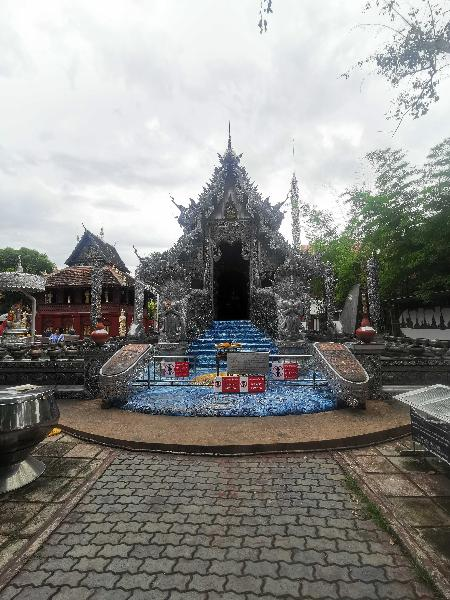

Caption: 
วัดสีดำมีเจดีย์สีดำมีเจดีย์สีดำมีเจดีย์สีดำมีเจดีย์สีดำมีเจด


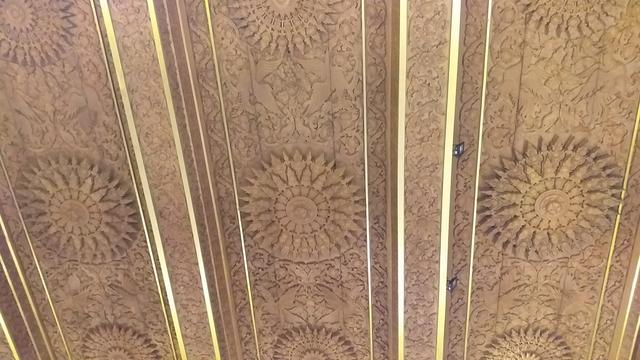

Caption: 
ภาพของแผ่นไม้สีทองมีลายดอกไม้หลายดอกอยู่บนหลังคา


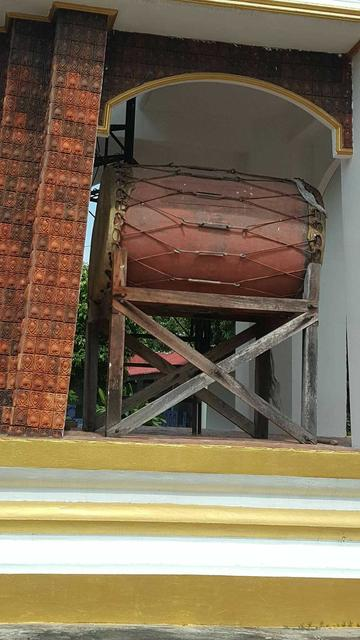

Caption: 
กลองสีแดงขนาดใหญ่วางอยู่บนขาตั้งไม้


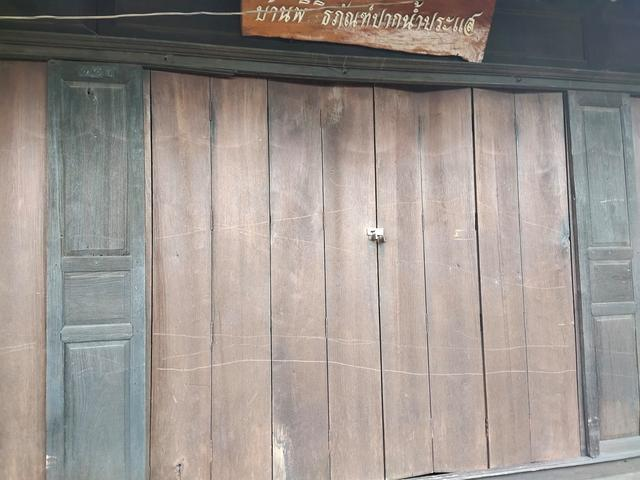

Caption: 
ประตูไม้สีน้ำตาลมีลายไม้สีน้ำตาลติดอยู่ด้านหน้า


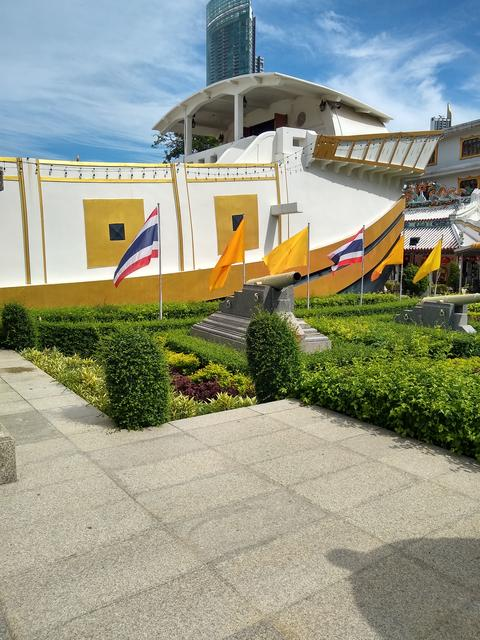

Caption: 
อาคารสีขาวมีธงชาติไทยที่แขวนอยู่บนหลังคา


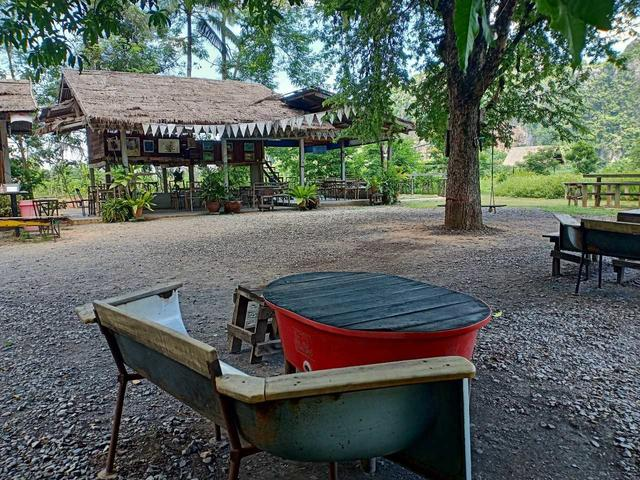

Caption: 
โต๊ะไม้สีดำมีหม้อสีแดงอยู่บนโต๊ะไม้สีดำมีเก้าอี้ไม้สีดำอยู่ข้างๆ


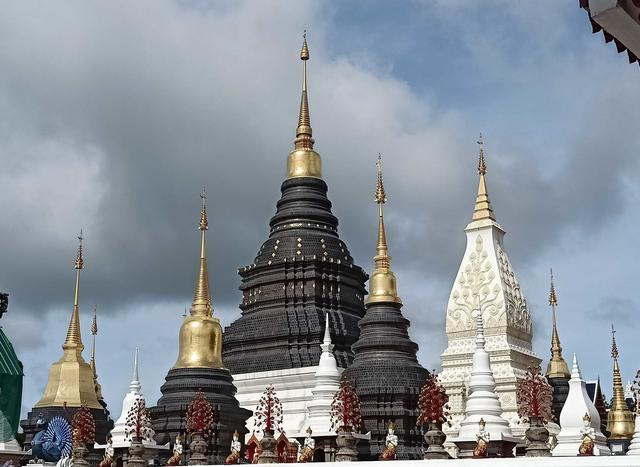

Caption: 
เจดีย์สีขาวและสีดำมีเสาสีทองหลายเสาตั้งอยู่บนยอดเจดีย์มีเมฆมาก


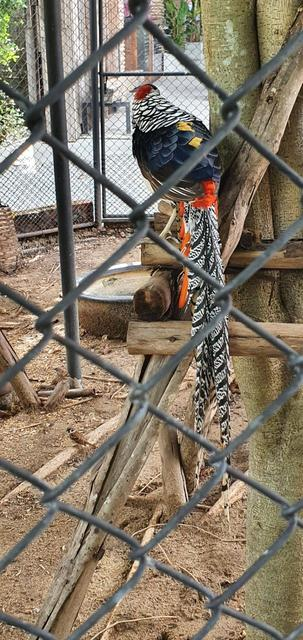

Caption: 
นกสีสวยงามมีหางยาวสีขาวสีแดงสีดำสีน้ำเงินสีเหลืองสีส้ม


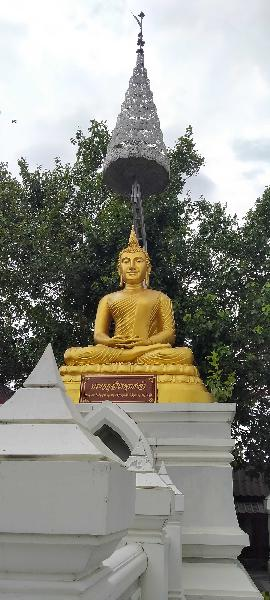

Caption: 
พระพุทธรูปสีทองตั้งอยู่บนเจดีย์สีขาว


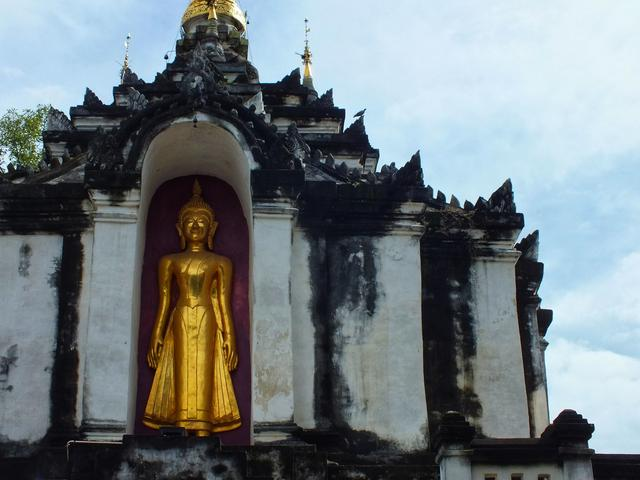

Caption: 
พระพุทธรูปสีทองตั้งอยู่ภายในโบสถ์สีขาว


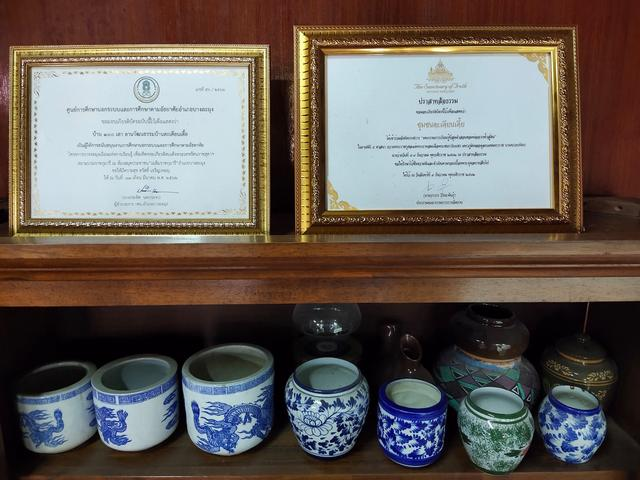

Caption: 
ถ้วยแก้วสีขาวและสีเขียววางอยู่บนชั้นวางไม้


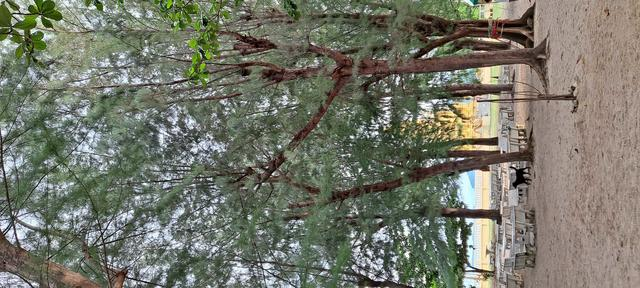

Caption: 
ต้นไม้สีเขียวมีกิ่งก้านยาวตั้งอยู่บนพื้นทราย
CPU times: user 1.17 s, sys: 8.71 ms, total: 1.18 s
Wall time: 1.16 s


In [ ]:
%%time
# Plot images with their captions
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()
for img_path, caption, ax in zip(image_paths, captions, axes):
    img = Image.open("/content/data/val2017/"+img_path).convert("RGB")
    ax.imshow(img)
    ax.set_title(caption, fontsize=12)
    ax.axis("off")

plt.tight_layout()
plt.show()